# Interfacial tension and density profiles: n-Butanol + MTBE + Water

Phase equilibria and interfacial behavior modeled by PRSV + MHV(NRTL) together with Square gradient theory.

Phase equilibria is solved by a combination of multiflash algorithm proposed by Gupta et al[1]. and minizamization of Gibbs free energy as proposed by Michelsen[2].

Euler - Lagrange boundary value problem of Square gradient Theory was solved using orthogonal collocation.

$$ \sum_j c_{ij} \frac{d^2 \rho_j}{dz^2} = \mu_i - \mu_i^0 \qquad i = 1,...,c \\
\rho(z \rightarrow -\infty) = \rho^\alpha \qquad \rho(z \rightarrow \infty) = \rho^\beta $$

### References

[1] A. K. Gupta, P. Raj Bishnoi, N. Kalogerakis, Fluid Phase Equilib., 63, 65–89(1991).

[2] Michelsen, M., Mollerup, J., Thermodynamic Models: Fundamental & Computational Aspects, 2nd. ed, 2008.

In [55]:
import numpy as np
from pandas import ExcelFile
import matplotlib.pyplot as plt
import ternary
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, IntSlider
from toggle import hide_toggle
hide_toggle()

In [67]:
display(hide_toggle())
excel = ExcelFile('ButMTBEAgua.xlsx')

#Equilibrium data
dfdata = excel.parse('Tensiones')
T = np.asarray(dfdata.iloc[:, 0])
P = np.asarray(dfdata.iloc[:, 1])
ten_av = np.asarray(dfdata.iloc[:, 5])
ten_ov = np.asarray(dfdata.iloc[:, 6])
ten_oa = np.asarray(dfdata.iloc[:, 7])
W = np.asarray(dfdata.iloc[:, 8:11])
X = np.asarray(dfdata.iloc[:, 11:14])
Y = np.asarray(dfdata.iloc[:, 14:])

<IPython.core.display.Javascript object>


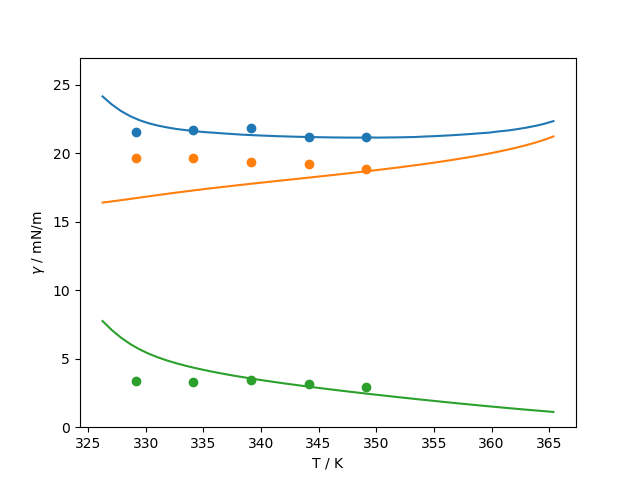

(0, 27)

In [65]:
display(hide_toggle())
#Datos experimentales   
Texp = np.array([56,61,66,71,76]) + 273.15
ten12 = np.array([19.67,19.64,19.34,19.21,18.88])
ten13 = np.array([21.54,21.73,21.83,21.18,21.20])
ten23 =np.array([3.37,3.27,3.47,3.16,2.96])

#Datos simulacion
Tsim = np.array([330.15,335.15,340.15,345.15,350.15])
ten13s = np.array([23.403,22.248,21.932,21.723,21.513])
ten12s = np.array([18.572, 18.414,18.676, 19.252, 19.517])
ten23s = np.array([4.7035, 3.761,3.077,2.523,2.005])

    
figt = plt.figure()
axt = figt.add_subplot(111)
axt.plot(T, ten_av, label = 'L(Aq)/V')
#axt.text(335, 24, 'L(Aq)/V', color = 'C0')
axt.plot(T, ten_ov, label = 'L(Org)/V')
#axt.text(335, 15, 'L(Org)/V', color = 'C1')
axt.plot(T, ten_oa, label = 'L(Org)/L(Aq)')
#axt.text(335, 6, 'L(Org)/L(Aq)', color = 'C2')
#axt.plot(T, ten2[:,1] + ten2[:,2], '-.')
#axt.text(350, 23, 'L(Org)/L(Aq) + L(Org)/V', color = 'r')

axt.scatter(Texp, ten13)
axt.scatter(Texp, ten12)
axt.scatter(Texp, ten23)
#axt.scatter(Texp, ten23 + ten12)

axt.set_xlabel('T / K')
axt.set_ylabel(r'$\gamma$ / mN/m')
axt.set_ylim([0, 27])

In [50]:
%matplotlib inline
fign = plt.figure(figsize = (12,4))
fign.subplots_adjust(wspace = 0.3, hspace = 0.1)

a1n = fign.add_subplot(131)
title1 = 'L(Aq) / V'
a1n.set_title(title1)
a1n.set_xlabel(r"$Z / \AA$")
a1n.set_ylabel(r"$\rho$" + " $mol/cm^3$")
a1n.set_ylim([0, 0.045])
a1n.set_xlim([0, 30])

a2n = fign.add_subplot(132)
title2 = 'L(Org) / V'
a2n.set_title(title2)
a2n.set_ylim([0, 0.045])
a2n.set_xlim([0, 12.5])
a2n.set_xlabel(r"$Z / \AA$")

a3n = fign.add_subplot(133)
title3 = 'L(Org) / L(Aq)'
a3n.set_title(title3)
a3n.set_xlabel(r"$Z / \AA$")
a3n.set_ylim([0, 0.045])
a3n.set_xlim([0, 12.5])
a2n.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
a1n.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
a3n.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

line11 = a1n.plot([], [], label = 'MTBE')
line12 = a1n.plot([], [], label = 'Ethanol')
line13 = a1n.plot([], [], label = 'Water')

line21 = a2n.plot([], [])
line22 = a2n.plot([], [])
line23 = a2n.plot([], [])

line31 = a3n.plot([], [])
line32 = a3n.plot([], [])
line33 = a3n.plot([], [])
plt.close(fign)

In [66]:
display(hide_toggle())
def function(i):
    dften = excel.parse(i)
    zwy = np.asarray(dften.iloc[:, 0])
    rwy = np.asarray(dften.iloc[:, 1:4]).T
    zxw = np.asarray(dften.iloc[:, 4])
    rxw = np.asarray(dften.iloc[:, 5:8]).T
    zxy = np.asarray(dften.iloc[:, 4])
    rxy = np.asarray(dften.iloc[:, 5:8]).T
    line11[0].set_data(zwy, rwy[0])
    line12[0].set_data(zwy, rwy[1])
    line13[0].set_data(zwy, rwy[2])
    line21[0].set_data(zxy, rxy[0])
    line22[0].set_data(zxy, rxy[1])
    line23[0].set_data(zxy, rxy[2])
    line31[0].set_data(zxw, rxw[0])
    line32[0].set_data(zxw, rxw[1])
    line33[0].set_data(zxw, rxw[2])
    a1n.set_xlim(0, zwy[-1])
    a2n.set_xlim(0, zxy[-1])
    a3n.set_xlim(0, zxw[-1])

    fign.suptitle('Density profiles at ' + str(round(T[i], 2)) +'K')
    return fign

ti = IntSlider(value=1,    min=1,    max=49, step=1, description = 'T index', continuous_update=False)
interact(function, i = ti)

interactive(children=(IntSlider(value=1, continuous_update=False, description='T index', max=49, min=1), Outpu…

<function __main__.function(i)>